<a href="https://colab.research.google.com/github/BhanusriBysani/alfidotech/blob/main/instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pandas matplotlib seaborn wordcloud


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Load the dataset
df = pd.read_csv('comments.csv')

# Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Quick check
print(df.columns)
print(f"Total comments: {len(df)}")
print(f"Unique users: {df['user__id'].nunique()}")


Index(['id', 'comment', 'user__id', 'photo_id', 'created_timestamp',
       'posted_date', 'emoji_used', 'hashtags_used_count'],
      dtype='object')
Total comments: 7488
Unique users: 77


<ipython-input-8-a555d232fe4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='magma')


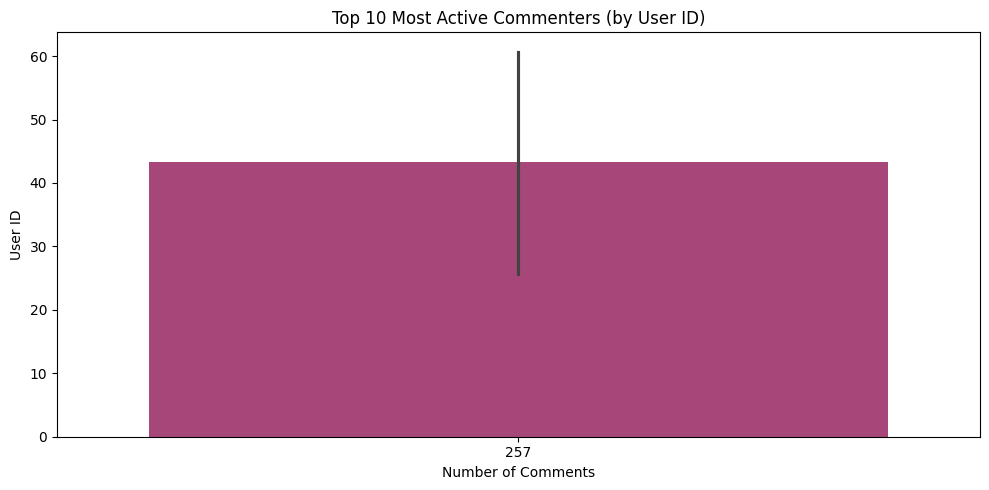

In [8]:
top_users = df['user__id'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_users.values, y=top_users.index, palette='magma')
plt.title("Top 10 Most Active Commenters (by User ID)")
plt.xlabel("Number of Comments")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()


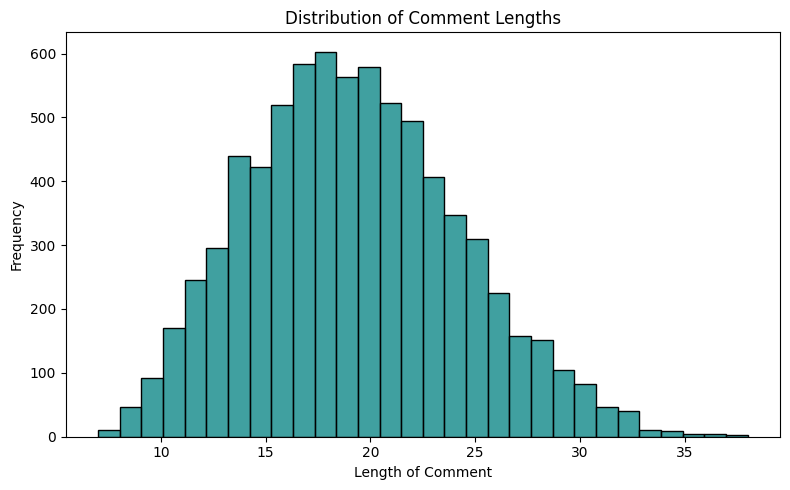

In [9]:
df['comment_length'] = df['comment'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['comment_length'], bins=30, color='teal')
plt.title("Distribution of Comment Lengths")
plt.xlabel("Length of Comment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


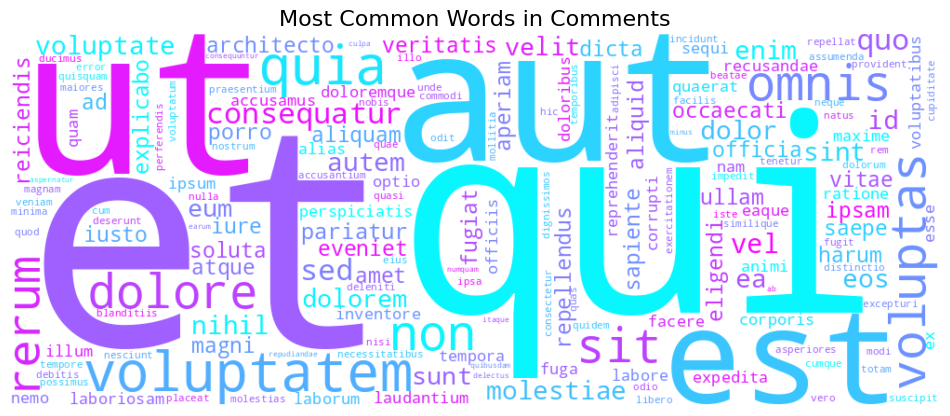

In [10]:
text = ' '.join(df['comment'].astype(str))

# Remove special characters
text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', text)

wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='cool').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Comments", fontsize=16)
plt.show()


<ipython-input-11-633b1cee58ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emoji_usage.index, y=emoji_usage.values, palette='pastel')


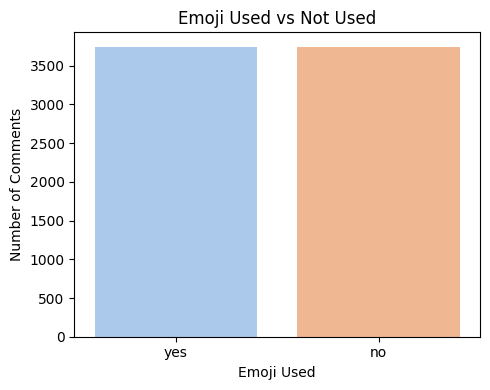

In [11]:
emoji_usage = df['emoji_used'].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=emoji_usage.index, y=emoji_usage.values, palette='pastel')
plt.title("Emoji Used vs Not Used")
plt.xlabel("Emoji Used")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


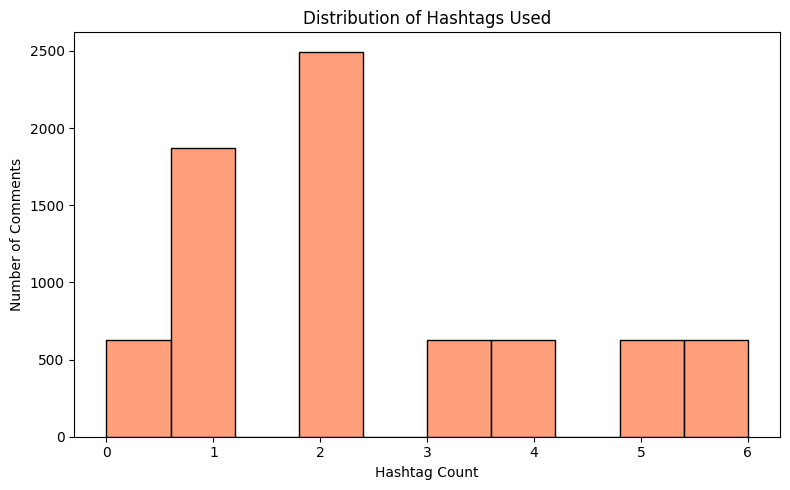

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['hashtags_used_count'], bins=10, kde=False, color='coral')
plt.title("Distribution of Hashtags Used")
plt.xlabel("Hashtag Count")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()
